#PURPOSE:Analysing the scores of students affected by various factors

##importing various libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/student score.csv')
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [5]:
df.head(1)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [34]:
for col in df.describe(include='object').columns:
   print(col)
   print(df[col].unique())
   print('-'*50)

Gender
['female' 'male']
--------------------------------------------------
EthnicGroup
[nan 'group C' 'group B' 'group A' 'group D' 'group E']
--------------------------------------------------
ParentEduc
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
--------------------------------------------------
LunchType
['standard' 'free/reduced']
--------------------------------------------------
TestPrep
['none' nan 'completed']
--------------------------------------------------
ParentMaritalStatus
['married' 'single' 'widowed' nan 'divorced']
--------------------------------------------------
PracticeSport
['regularly' 'sometimes' 'never' nan]
--------------------------------------------------
IsFirstChild
['yes' 'no' nan]
--------------------------------------------------
TransportMeans
['school_bus' nan 'private']
--------------------------------------------------
WklyStudyHours
['< 5' '5 - 10' '> 10' nan]
----------------

In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [9]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

##counting students distribution genderwise

In [10]:
df['WklyStudyHours'].value_counts()

5 - 10    16246
< 5        8238
> 10       5202
Name: WklyStudyHours, dtype: int64

In [11]:
df['Gender'].value_counts()

female    15424
male      15217
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

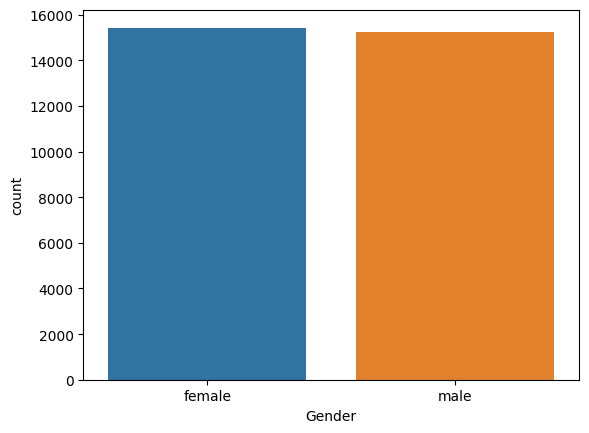

In [12]:
sns.countplot(x='Gender',data=df)

##analysing impact of parent's education on students scores and found that students with highly qualified parents get good scores

In [14]:
p_edu_score=df.groupby(['ParentEduc'])['MathScore','ReadingScore','WritingScore'].mean()
p_edu_score

<ipython-input-14-41a45259c995>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  p_edu_score=df.groupby(['ParentEduc'])['MathScore','ReadingScore','WritingScore'].mean()


,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


<Axes: ylabel='ParentEduc'>

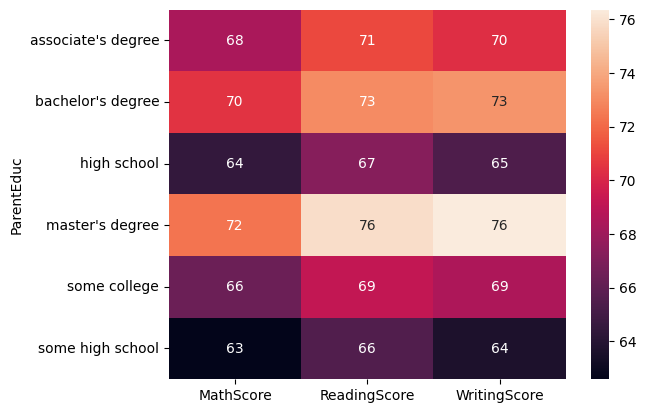

In [18]:
sns.heatmap(data=p_edu_score,annot=True)

##analysing impact of parent's marital status on students scores and found that it is not much impacting on student scores

In [21]:
p_marital=df.groupby(['ParentMaritalStatus'])['MathScore','ReadingScore','WritingScore'].mean()
p_marital

<ipython-input-21-3248a8a03235>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  p_marital=df.groupby(['ParentMaritalStatus'])['MathScore','ReadingScore','WritingScore'].mean()


,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


<Axes: ylabel='ParentMaritalStatus'>

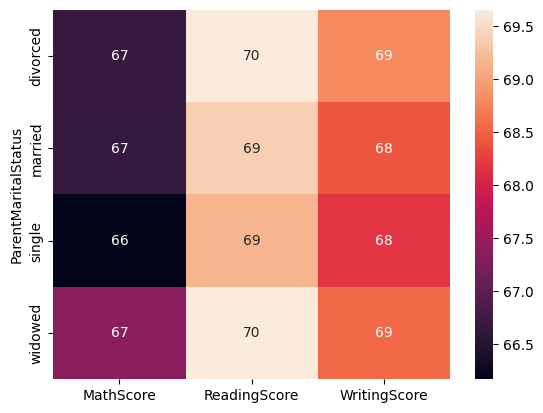

In [23]:
sns.heatmap(data=p_marital,annot=True)

##analysing impact of weekly study hours on students scores and found that it is sufficiently impacting on student scores

In [25]:
wsh=df.groupby(['WklyStudyHours'])['MathScore','ReadingScore','WritingScore'].mean()
wsh

<ipython-input-25-6fe7db89175e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wsh=df.groupby(['WklyStudyHours'])['MathScore','ReadingScore','WritingScore'].mean()


,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


<Axes: ylabel='WklyStudyHours'>

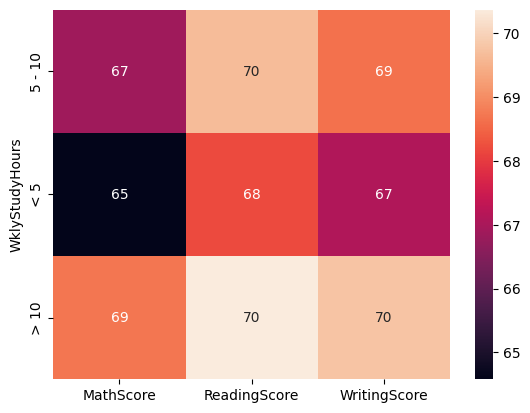

In [27]:
sns.heatmap(data=wsh,annot=True)

In [28]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

##analysing impact of Practicing Sport on students scores and found that it is sufficiently impacting on student scores

<ipython-input-68-893171ba83cf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ps=df.groupby(['PracticeSport'])['MathScore','ReadingScore','WritingScore'].mean()


<Axes: ylabel='PracticeSport'>

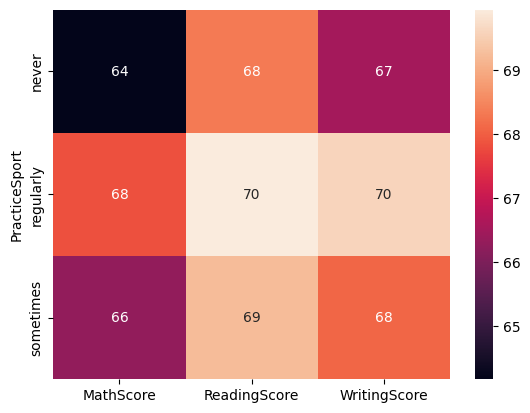

In [68]:
ps=df.groupby(['PracticeSport'])['MathScore','ReadingScore','WritingScore'].mean()
sns.heatmap(data=ps,annot=True)

##analysing impact of test preparation on students scores and found that it is highly impacting on student scores

<ipython-input-70-8401f056b8ea>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tp=df.groupby(['TestPrep'])['MathScore','ReadingScore','WritingScore'].mean()


<Axes: ylabel='TestPrep'>

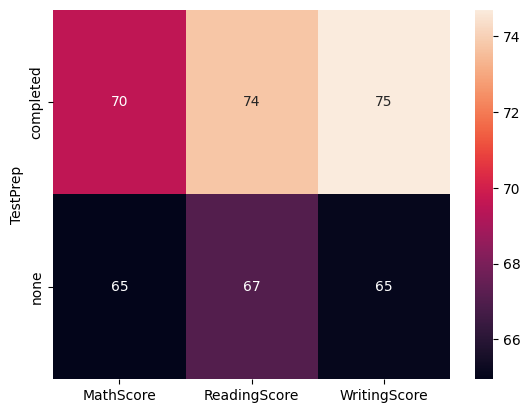

In [70]:
tp=df.groupby(['TestPrep'])['MathScore','ReadingScore','WritingScore'].mean()
sns.heatmap(data=tp,annot=True)

In [74]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

##**FINAL CONCLUSION:** From all the analysis it is found that Parent's Education,test preparation and weekly study hours are highly impacting the scores of students while Parent's Marital Status, Practicing Sports are slightly impacting the students score.